In [1]:
import skfuzzy as fz
from skfuzzy import control as ctrl
import numpy as np


#inisiasi
Tekdar = ctrl.Antecedent(np.arange(0,200,1),'Tekanan Darah')
Guldar = ctrl.Antecedent(np.arange(0,200,1),'Gula Darah')
Koles = ctrl.Antecedent(np.arange(0,300,1),'Kolesterol')
BMI = ctrl.Antecedent(np.arange(0,30,1),'Body Mass Index') 
Riwa = ctrl.Antecedent(np.arange(0,2,1),'Riwayat')
Hasil = ctrl.Consequent(np.arange(0,10,1),'Hasil')

D:\App\Anaconda\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


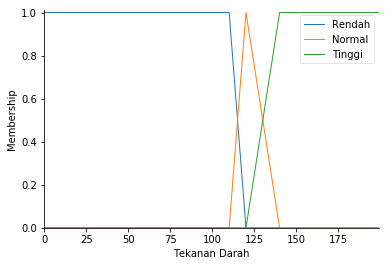

In [2]:
#Fungsi Keanggotaan Tekanan Darah
Tekdar['Rendah'] = fz.trapmf(Tekdar.universe,[0,0,110,120])
Tekdar['Normal'] = fz.trimf(Tekdar.universe,[110,120,140])
Tekdar['Tinggi'] = fz.trapmf(Tekdar.universe,[120,140,200,200])
Tekdar.view()

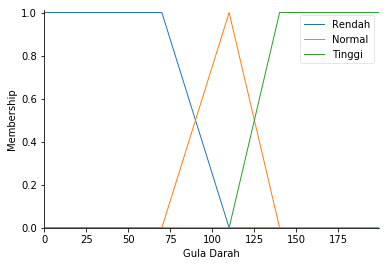

In [3]:
#Fungsi Keanggotaan Gula Darah
Guldar['Rendah'] = fz.trapmf(Guldar.universe,[0,0,70,110])
Guldar['Normal'] = fz.trimf(Guldar.universe,[70,110,140])
Guldar['Tinggi'] = fz.trapmf(Guldar.universe,[110,140,200,200])
Guldar.view()


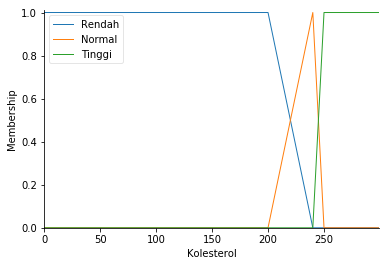

In [4]:
#Fungsi Keanggotaan Kolesterol
Koles['Rendah'] = fz.trapmf(Koles.universe,[0,0,200,240])
Koles['Normal'] = fz.trimf(Koles.universe,[200,240,250])
Koles['Tinggi'] = fz.trapmf(Koles.universe,[240,250,300,300])
Koles.view()

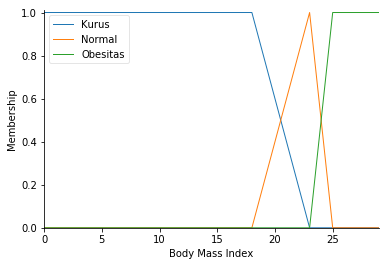

In [5]:
#Fungsi Keanggotaan Body Mass Index
BMI['Kurus'] = fz.trapmf(BMI.universe,[0,0,18,23])
BMI['Normal'] = fz.trimf(BMI.universe,[18,23,25])
BMI['Obesitas'] = fz.trapmf(BMI.universe,[23,25,30,30])
BMI.view()

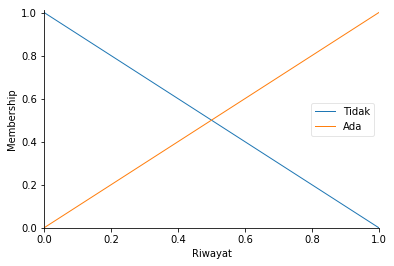

In [6]:
#Fungsi Keanggotaan Riwayat
Riwa['Tidak'] = fz.trapmf(Riwa.universe,[0,0,0,1])
Riwa['Ada'] = fz.trapmf(Riwa.universe,[1,1,1,1])
Riwa.view()

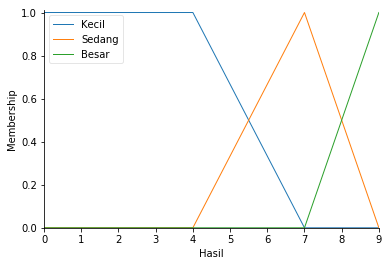

In [7]:
#Fungsi Keanggotaan Hasil
# Hasil['Kecil'] = fz.trapmf(Hasil.universe,[0,0,0.4,0.7])
# Hasil['Sedang'] = fz.trimf(Hasil.universe,[0.4,0.7,0.9])
# Hasil['Tinggi'] = fz.trapmf(Hasil.universe,[0.7,0.9,1,1])
# Hasil.view()
Hasil['Kecil'] = fz.trapmf(Hasil.universe,[0,0,4,7])
Hasil['Sedang'] = fz.trimf(Hasil.universe,[4,7,9])
Hasil['Besar'] = fz.trapmf(Hasil.universe,[7,9,10,10])
Hasil.view()

In [8]:
#Rule
Rb1 = ctrl.Rule(Tekdar['Normal'] & Guldar['Normal'] & Koles['Normal'] & BMI['Obesitas'] & Riwa['Ada'], Hasil['Sedang'])
Rb2 = ctrl.Rule(Tekdar['Normal'] & Guldar['Normal'] & Koles['Rendah'] & BMI['Obesitas'] & Riwa['Ada'], Hasil['Sedang'])
Rb3 = ctrl.Rule(Tekdar['Normal'] & Guldar['Rendah'] & Koles['Normal'] & BMI['Obesitas'] & Riwa['Ada'], Hasil['Sedang'])
Rb4 = ctrl.Rule(Tekdar['Normal'] & Guldar['Rendah'] & Koles['Rendah'] & BMI['Obesitas'] & Riwa['Ada'], Hasil['Sedang'])
Rb5 = ctrl.Rule(Tekdar['Tinggi'] & Guldar['Normal'] & Koles['Normal'] & BMI['Obesitas'] & Riwa['Ada'], Hasil['Besar'])
Rb6 = ctrl.Rule(Tekdar['Tinggi'] & Guldar['Normal'] & Koles['Rendah'] & BMI['Obesitas'] & Riwa['Ada'], Hasil['Besar'])
Rb7 = ctrl.Rule(Tekdar['Tinggi'] & Guldar['Rendah'] & Koles['Normal'] & BMI['Obesitas'] & Riwa['Ada'], Hasil['Besar'])
Rb8 = ctrl.Rule(Tekdar['Tinggi'] & Guldar['Rendah'] & Koles['Rendah'] & BMI['Obesitas'] & Riwa['Ada'], Hasil['Besar'])

HS1 = ctrl.ControlSystem([Rb1,Rb2,Rb3,Rb4,Rb5,Rb6,Rb7,Rb8])
HS2 = ctrl.ControlSystemSimulation(HS1)

Tekanan Darah : 128
Gula Darah : 105
Kolesterol : 220
Body Mass Index : 25
Riwayat : 1
Hasil :  6.809236947791164
Resiko Penyakit jantung dengan kategori : Sedang


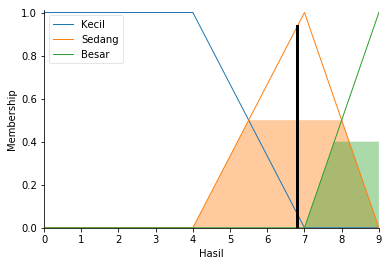

In [9]:
TD = input('Tekanan Darah : ')
GD = input('Gula Darah : ')
KL = input('Kolesterol : ')
BM = input('Body Mass Index : ')
RW = input('Riwayat : ')

HS2.input['Tekanan Darah'] = float(TD)
HS2.input['Gula Darah'] = float(GD)
HS2.input['Kolesterol'] = float(KL)
HS2.input['Body Mass Index'] = float(BM)
HS2.input['Riwayat'] = float(RW)

HS2.compute()

print('Hasil : ',HS2.output['Hasil'])
Hasil.view(sim=HS2)

print('Resiko Penyakit jantung dengan kategori : ', end='')
if HS2.output['Hasil'] <= 4:
    print('Kecil')
elif HS2.output['Hasil'] <= 9:
    print('Sedang')
else:
    print('Besar')
    